In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#1) Replace Nan values with correct value. And justify why you have chosen the same.

#in this case, we can't take mean, median or mode because not placed students have Nan values in salary column;
#we can't delete entire row because non placed students data will be missing;
#we can't go for semi supervised learning; 

Salary column has 67 Nan values should be replaced with zero, so we wont get any missing of datas and it is the correct procedure for this dataset.

In [5]:
# 1) replacing nan values = 0
dataset["salary"].fillna(0,inplace=True)

In [6]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#2)How many of them are not placed?

In [8]:

dataset["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

#Using value_counts() function, we found there are 67 students were not placed

#3) find the reason for non placement from the dataset

In [9]:

def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtypes=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [10]:
quan,qual=quanQual(dataset)

In [11]:
non_placement_data = dataset[dataset['status'] == 'Not Placed']

In [12]:
non_placement_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [13]:
placement_data = dataset[dataset['status'] == 'Placed']

In [14]:
placement_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [15]:
descriptive_placement=pd.DataFrame(index=["Mean"],columns=quan)
for columnName in quan:
    descriptive_placement[columnName]["Mean"]=placement_data[columnName].mean()
    

In [16]:
descriptive_placement

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,106.878,71.7215,69.9266,68.7405,73.238,62.5794,288655


In [17]:
descriptive_non_placement=pd.DataFrame(index=["Mean"],columns=quan)
for columnName in quan:
    descriptive_non_placement[columnName]["Mean"]=non_placement_data[columnName].mean()
  

In [18]:
descriptive_non_placement

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,110.478,57.544,58.3955,61.1342,69.5879,61.6128,0


In [19]:
#average taken for both placement and non placement students, students those scored average marks less than 60 percent are not placed

#4) What kind of relation between salary and mba_p?

In [20]:
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Relation between salary and mba_p is directly proportional

correlation of mba_p marks and salary is 0.13, which is low degree of positive correlation 13% directly proportional

 positive correlation

#5) which specialization is getting minimum salary?

In [21]:
dataset["specialisation"].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [22]:
Mkt_fin= dataset[dataset['specialisation'] == 'Mkt&Fin'].mean()

In [23]:
Mkt_fin

sl_no          105.425000
ssc_p           68.961667
hsc_p           68.670583
degree_p        67.796083
etest_p         74.885500
mba_p           62.825667
salary      236591.666667
dtype: float64

In [24]:
Mkt_HR= dataset[dataset['specialisation'] == 'Mkt&HR'].mean()

In [25]:
Mkt_HR

sl_no          111.252632
ssc_p           65.208737
hsc_p           63.380632
degree_p        64.569053
etest_p         68.582737
mba_p           61.586632
salary      150842.105263
dtype: float64

Mean of Mkt&HR salary is lower than Mkt_fin, So Marketing and HR specialisation is getting minimum salary

In [26]:
#2nd method for minimum getting salary
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR","1.5rule","Lesser","Greater",
                                "Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=placement_data[columnName].mean()
    descriptive[columnName]["Median"]=placement_data[columnName].median()
    descriptive[columnName]["Mode"]=placement_data[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=placement_data.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=placement_data.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=placement_data.describe()[columnName]["75%"]
    descriptive[columnName]["Q4:100%"]=placement_data.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=placement_data[columnName].min()
    descriptive[columnName]["Max"]=placement_data[columnName].max()
    

In [27]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,106.878,71.7215,69.9266,68.7405,73.238,62.5794,288655
Median,108.5,72.5,68,68,72,62.245,265000
Mode,1,73,63,65,60,56.7,300000
Q1:25%,57.75,65,63,65,60,57.7725,240000
Q2:50%,108.5,72.5,68,68,72,62.245,265000
Q3:75%,153.25,78.125,75.25,72.4225,85,66.76,300000
Q4:100%,214,89.4,97.7,91,98,77.89,940000
IQR,95.5,13.125,12.25,7.4225,25,8.9875,60000
1.5rule,143.25,19.6875,18.375,11.1337,37.5,13.4812,90000
Lesser,-85.5,45.3125,44.625,53.8663,22.5,44.2912,150000


overall minimum getting salary is 200000

#6) How many of them getting above 500000 salary?

In [28]:
def fiveLsalary(dataset):
    for i in dataset['salary']:
        if(i>500000):
            print('Students getting salary above 5L:',i)

In [29]:
fiveLsalary(dataset)

Students getting salary above 5L: 940000.0
Students getting salary above 5L: 690000.0
Students getting salary above 5L: 650000.0


Three of them getting above five lakhs salary

#7) Test the analysis of variance between etest_p and mba_p at significance level 5% (make decision using hypothesis testing )

In [30]:
#One independent variable
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

p value is greater than 0.05 so accepting null hypothesis H0- There is no significant difference between these columns

#8) Test the similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of5%
(Make decision using hypothesis testing)

In [31]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Sci_Tech=dataset[dataset['degree_t']=='Sci&Tech']['salary']
Mkt_HR=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(Sci_Tech,Mkt_HR)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

Lesser the statistic value higher the similarity; pvalue should be less than five percentage;
so in this case , salary of both Sci_Tech and Mkt_HR shows high similarity

p value is lesser than 0.05 so rejecting null hypothesis and accepting alternate hypothesis H1
Alternate hypothesis H1 - There is similarity between Sci_Tech and Mkt_HR and also there is significant difference 

#9) Convert the normal distribution to standard normal distribution for salary column

we can convert the normal distribution to standard normal distribution by using z-score; standard normal distribution always have value mean=0 and std=1 like wise the graph of standard normal distribution is plotted; z-score=((x-mu)/sigma)
where x is observation
mu is mean and
sigma is standard deviation

In [32]:
def StdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

C:\Users\abina\Anac\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


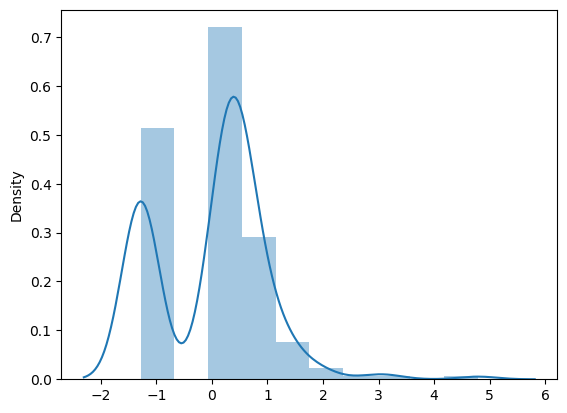

In [33]:
StdNBgraph(dataset['salary'])

#10) What is the probability Density function of the salary range from 700000 to 900000?

In [34]:
def get_pdf_prob(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'pink'},color='yellow')
    pyplot.axvline(startrange,color='green')
    pyplot.axvline(endrange,color='green')
    
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('mean=%.3f, standard deviation=%.3f' %(sample_mean,sample_std))
    
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    
    print("The area between range ({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\abina\Anac\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


mean=198702.326, standard deviation=154780.927
The area between range (700000,900000):0.0005973310593974868


0.0005973310593974868

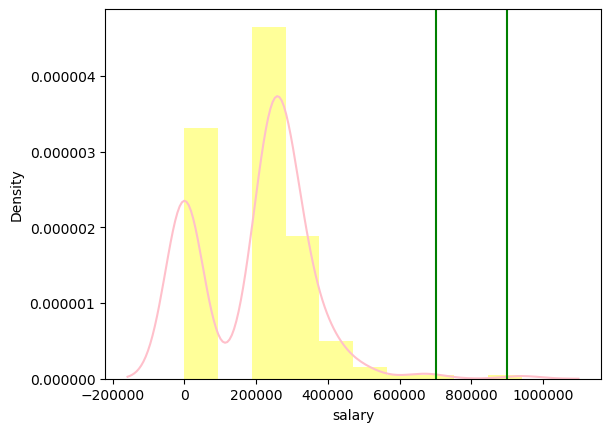

In [35]:
get_pdf_prob(dataset['salary'],700000,900000)

probability Density function of the salary range from 700000 to 900000 is 0.00475865

#11) Test the similarity between the degree_t(Sci&Tech) with respect to etest_p and mba_p with respect to salary at significance level of 5%(Make decision using hypothesis testing)

Same group (Sci&Tech)but different condition( etest_p and mba_p) -Dependent which is paired ttest

In [36]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
etest_p=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba_p=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest_p,mba_p)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

lesser the statistic value higher the similarity 
pvalue is >0.05 so accepting hull hypothesis - There is no similarity between etest_p and mba_p

#12)Which parameter is highly correlated with salary?

In [37]:
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


when comparing the columns with salary, ssc_p is highly correlated at 0.53 
which is low degree of positive correlation 53% directly proportional

 positive correlation

#13)plot any useful graph and explain it

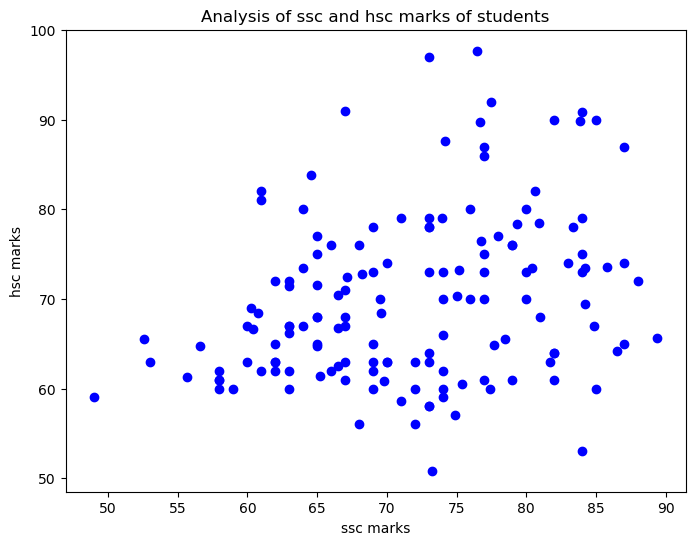

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(placement_data['ssc_p'], placement_data['hsc_p'], color='blue')
plt.title('Analysis of ssc and hsc marks of students')
plt.xlabel('ssc marks')
plt.ylabel('hsc marks')
plt.show()

Scatterplot shows the relationship between two variables. In a scatter plot, each data point is represented as a dot, with its position on the graph determined by the values of the two variables being plotted

The analysis of students performance in ssc and hsc were plotted easily through scatter plot graph

C:\Users\abina\Anac\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


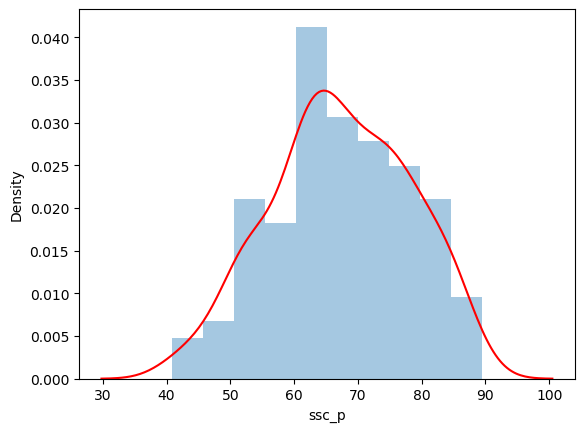

In [40]:
#univariate analysis
import seaborn as sns
sns.distplot(dataset['ssc_p'],hist=True, kde= True, kde_kws={'color':'red'})
plt.show()

    1.Distribution plot of ssc_p marks are plotted in histogram (hist =true)with respect to density because we have mentioned kde=true, kernel density estimation.
    2.By passing the parameter kde_kws we are specifying that kde plot should be present in red color

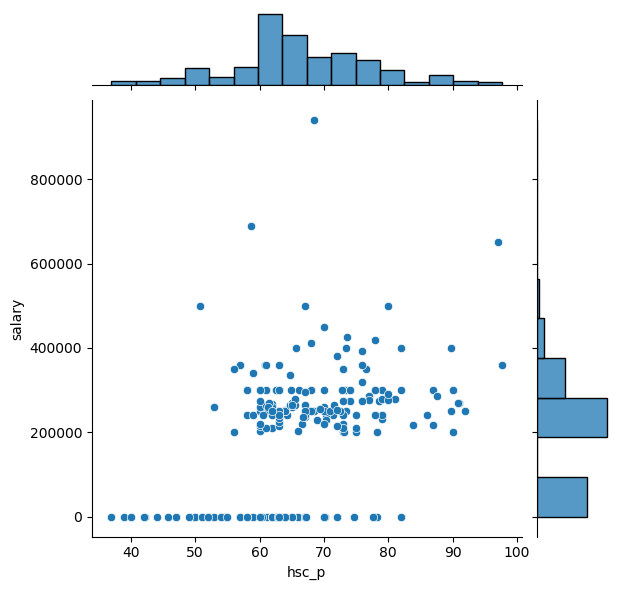

In [41]:
#Bivariate analysis
sns.jointplot(x='hsc_p',y='salary',data=dataset)
plt.show()

    1.In the above jointplot graph , we can easily see both scatter plot and histogram side by side
    2.The graph is plotted between hsc_p marks and salary of students, we can easily analysis the salary according to students marks here.

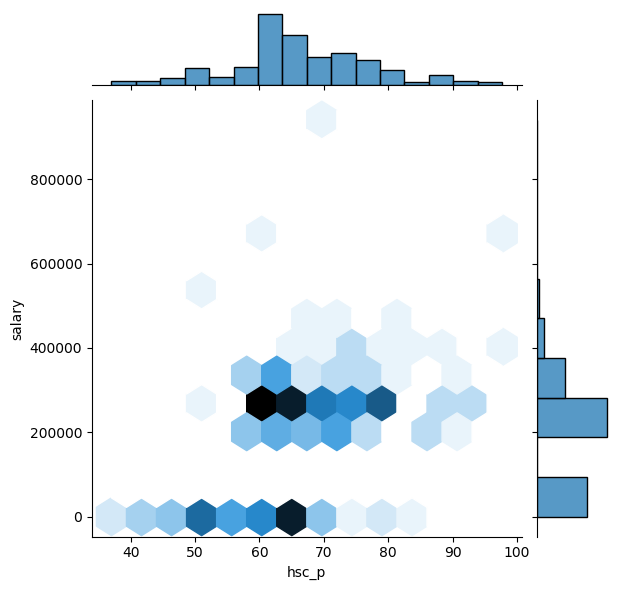

In [42]:
sns.jointplot(x='hsc_p',y='salary',data=dataset, kind='hex')
plt.show()

    1.Here in the above graph we have changed the graph type to hex by giving kind= 'hex';
    2.Hex having a concept of heatmap, heatmap is used to visualize the datas easily, when data comes to over repeatation , it is represented by dark shades; we can understand that data is not repeated ,when it is in light shade.
    3.The color shade increases or decreases according to the repeatation of data.
    4.Both histogram and heatmap is plotted by using jointplot.

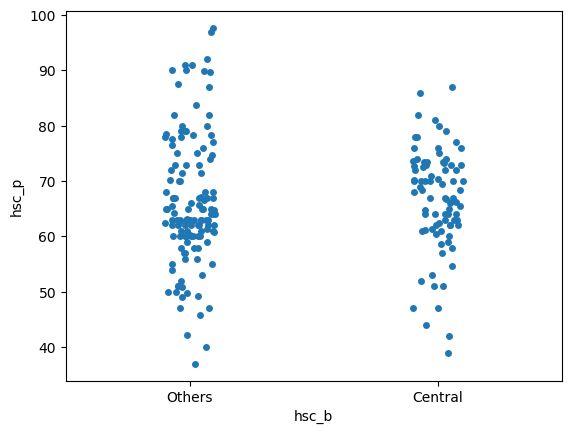

In [43]:
#categorical analysis
sns.stripplot(x='hsc_b',y='hsc_p',data=dataset)
plt.show()

    1.Strip plot is used to do analysis between quantitative and qualitative data
    2.Here in this graph, we can easily identify the mark ranges of others and central board students marks by using strip  plot.
    3.By analysing this graph, others board students performed well in hsc exam than central  board students because others students mark range is more than 90 but in central it ended with below 90.

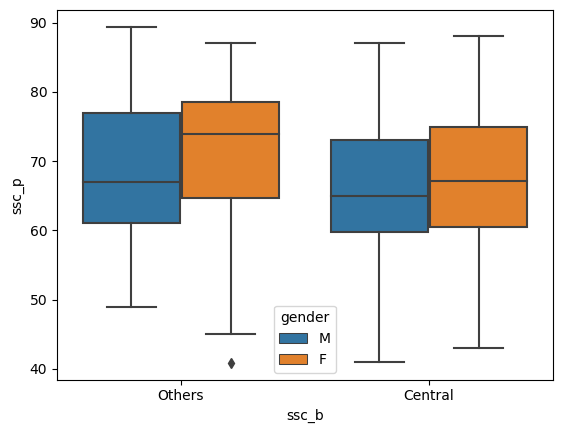

In [44]:
#boxplot
sns.boxplot(x="ssc_b",y="ssc_p",data=dataset,hue='gender')
plt.show()

    1.Box plot resembles the concept of percentile, the box shaped graph present in between the start range and end range
    2.Bottom line of boxplot represents Q1, mid line of box represents Q2, the upper third line is Q3 and end range is Q4
    3.In this above graph is plotted between boards of ssc and students marks of ssc.
    4.hue=gender is used to different the marks of male and female in others and central.
    5.In others, male students mark range is 50 to 90 and female students mark range starts from 45 to 86, so male students performed well.
    6.In central board, male students mark range is 42 to 86 and female students mark range starts from 45 to 88, so female students performed well.
    7. In overall performance, others board students performed well in ssc than central board students.

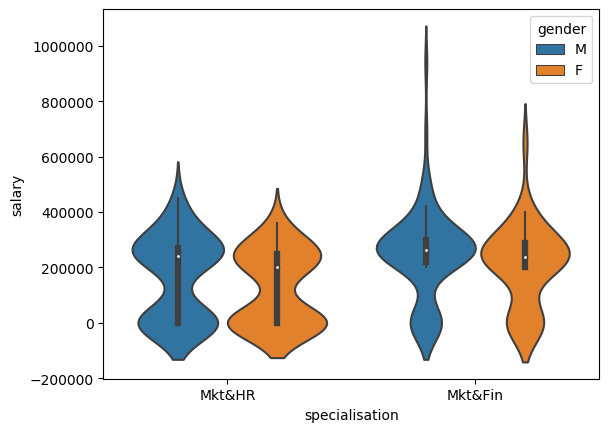

In [47]:
#violinplot
sns.violinplot(x='specialisation',y='salary',data=dataset,hue='gender')
plt.show()

    1. In violinplot, we can see both density and box plot range between input and output.
    2. The above graph is plotted to find which specialisation gets more salary.
    3. In Mkt and HR specialisation, salary range of male starts from 0 to 6 lakhs and female starts from 0 to 5 lakhs.
    4. In Mkt and Finance specialisation, salary range of male starts from 2 lakhs to 10 lakhs and in female starts from        2 lakhs to 8 lakhs.
    5. By analysing the violin plot graph, we can easily conclude that Mkt and Finance specialisation gets more salary than Mkt and HR.

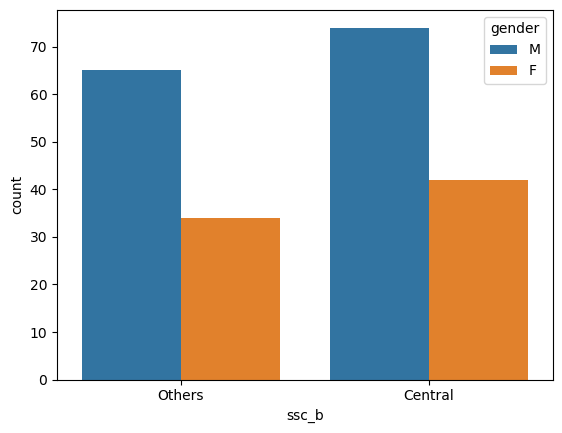

In [49]:
sns.countplot(x='ssc_b',data=dataset,hue='gender')

    1. count plot represents the count of the datas present in the dataset.
    2. The above count plot graph is plotted for ssc board, hue=gender seggregates the male and female count of others and central board 
    3. count of others board male is 65 and female is 35 .
    4. count of central board male is 78 and female is 42.